In [2]:
# Data & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Handling imbalance
from imblearn.over_sampling import SMOTE


In [3]:
# Load your dataset from Google Drive
file_path = '/content/drive/MyDrive/internship project/final_data_updated.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,Name,Subtotal,Shipping,Taxes,Total,Discount Amount,Shipping Method,Billing name,Billing Address 1,Billing City,...,Vendor,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Billing Province Name,Shipping Province Name,Day,Month,Hour
0,#19174,486.0,0,74.13,486.0,100.0,Free,Anneysha Mukherjee,33 Beni Banerjee Avenue,Kolkata,...,Parle,web,0.0,CGST+SGST 18%,74.1321,West Bengal,West Bengal,19,June,14
1,#19173,527.0,0,25.10,527.0,38.0,Free,Namrata Mukherjee,P-46 MOTIJHEEL AVENUE,Kolkata,...,Keventer,web,0.0,CGST+SGST 5%,25.1000,West Bengal,West Bengal,19,June,14
2,#19172,720.0,0,109.83,720.0,0.0,Free,Mahul Manek,22 Rabindra Sarani Tiretti,Kolkata,...,Parle,shopify_draft_order,0.0,CGST+SGST 18%,109.8300,West Bengal,West Bengal,19,June,13
3,#19171,1144.0,0,78.96,1144.0,0.0,Free,On Liao,1282 Raj Danga Main Road,Kolkata,...,Metro,web,0.0,CGST+SGST 18%,51.1000,West Bengal,West Bengal,19,June,13
4,#19170,259.0,0,39.51,259.0,20.0,Free,Devjani Barman,13 Kali Kumar Mukherjee Lane Naora Shibpur,Howrah,...,Metro,web,0.0,CGST+SGST 18%,39.5100,West Bengal,West Bengal,19,June,13


In [4]:
# Create the 'Churn' column: 1 if refunded, else 0
df['Churn'] = df['Refunded Amount'].apply(lambda x: 1 if x > 0 else 0)

# Quick check
df['Churn'].value_counts()


,count
Churn,
0,17036
1,81


In [5]:
# Drop columns that could leak the target info
X = df.drop(['Churn', 'Refunded Amount'], axis=1)
y = df['Churn']


In [6]:
# Choose only safe, small categorical columns
categorical_cols = ['Shipping Method', 'Payment Method', 'Source']

# Copy the data to avoid modifying the original
X_selected = X.copy()

# One-hot encode the selected categorical columns
X_encoded = pd.get_dummies(X_selected, columns=categorical_cols)

# Optional: Drop 'Vendor' if it causes too many columns
if 'Vendor' in X_encoded.columns:
    X_encoded = X_encoded.drop(columns=['Vendor'])


In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ✅ Step 1: Define features and target
X = X_encoded
y = df['Churn']  # assuming this is your original target column

# ✅ Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 3: Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Optional: Check class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


ValueError: could not convert string to float: '#14013'

In [10]:
# Find non-numeric columns
non_numeric = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index(['Name', 'Billing name', 'Billing Address 1', 'Billing City',
       'Billing Zip', 'Billing Province', 'Billing Country', 'Shipping name',
       'Shipping Address 1', 'Shipping City', 'Shipping Zip',
       'Shipping Province', 'Shipping Country', 'Tax 1 Name',
       'Billing Province Name', 'Shipping Province Name', 'Month'],
      dtype='object')


In [11]:
X_train = X_train.drop(columns=non_numeric)
X_test = X_test.drop(columns=non_numeric)  # Do same for test


In [12]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Step 4: Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3398   10]
 [  16    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3408
           1       0.00      0.00      0.00        16

    accuracy                           0.99      3424
   macro avg       0.50      0.50      0.50      3424
weighted avg       0.99      0.99      0.99      3424



In [15]:
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate model
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Confusion Matrix:
[[3398   10]
 [  16    0]]

📝 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3408
           1       0.00      0.00      0.00        16

    accuracy                           0.99      3424
   macro avg       0.50      0.50      0.50      3424
weighted avg       0.99      0.99      0.99      3424



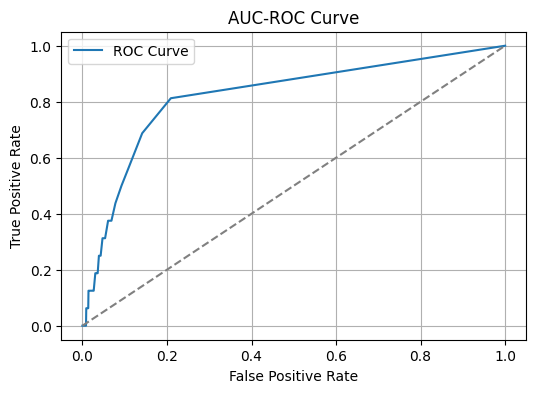

AUC Score: 0.8208993544600939


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# AUC score
print("AUC Score:", roc_auc_score(y_test, y_probs))


In [18]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

In [19]:
# Load the model back when needed
loaded_model = joblib.load('churn_model.pkl')

# Use it to predict again
y_pred_new = loaded_model.predict(X_test)


In [20]:
# Save the column names used for training
joblib.dump(X_train.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']

In [22]:
# Get churn probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Set your custom threshold
threshold = 0.3

# Predict churn if probability >= threshold
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate new predictions
from sklearn.metrics import classification_report, accuracy_score, recall_score

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"🔁 Recall (Churned customers): {recall_score(y_test, y_pred_custom):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_custom))



✅ Accuracy: 0.9854
🔁 Recall (Churned customers): 0.0625

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3408
           1       0.03      0.06      0.04        16

    accuracy                           0.99      3424
   macro avg       0.51      0.53      0.52      3424
weighted avg       0.99      0.99      0.99      3424



In [23]:
X_test_with_preds = X_test.copy()
X_test_with_preds['Actual_Churn'] = y_test.values
X_test_with_preds['Predicted_Churn'] = y_pred_custom  # using thresholded predictions
X_test_with_preds['Churn_Probability'] = y_probs


In [24]:
# See only the customers likely to churn
churned_customers = X_test_with_preds[X_test_with_preds['Predicted_Churn'] == 1]
print("🔎 High-risk churn customers:\n", churned_customers.head())


🔎 High-risk churn customers:
        Subtotal  Shipping   Taxes   Total  Discount Amount  Lineitem discount  \
17102     14.00         0    1.50   14.00             0.00               0.00   
6795     768.96         0  117.30  768.96            95.04              95.04   
1185     515.00         0   78.56  515.00             0.00               0.00   
9051     153.00         0    9.33  153.00             4.00               0.00   
2147     537.00         0   81.92  537.00            19.00               0.00   

       Tax 1 Value  Day  Hour  Shipping Method_Basic  ...  Source_5674949  \
17102         1.50   20    15                  False  ...           False   
6795        117.30   21    14                  False  ...           False   
1185         78.56   11    20                  False  ...           False   
9051          2.97   22    14                  False  ...           False   
2147         81.92   18     9                  False  ...           False   

       Source_358629

In [25]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

# 1. Use predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# 2. Apply new threshold
threshold = 0.2
y_pred_custom = (y_probs >= threshold).astype(int)

# 3. Evaluate the results
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"🔁 Recall (Churned customers): {recall_score(y_test, y_pred_custom):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_custom))


✅ Accuracy: 0.9769
🔁 Recall (Churned customers): 0.1250

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3408
           1       0.03      0.12      0.05        16

    accuracy                           0.98      3424
   macro avg       0.51      0.55      0.52      3424
weighted avg       0.99      0.98      0.98      3424



In [26]:
X_test_with_preds = X_test.copy()
X_test_with_preds['Actual_Churn'] = y_test.values
X_test_with_preds['Predicted_Churn'] = y_pred_custom
X_test_with_preds['Churn_Probability'] = y_probs

# Save to CSV
X_test_with_preds.to_csv('churn_predictions_threshold_0.2.csv', index=False)
print("✅ Saved: churn_predictions_threshold_0.2.csv")


✅ Saved: churn_predictions_threshold_0.2.csv
